# 6.2 Exploring Relationships

## Table of contents
1. [Importing Libraries & Data](#imports)
2. [Data Wrangling](#paragraph1)
3. [Data Exploration](#paragraph2)
4. [Questions](#paragraph3)
5. [Hypotheses](#paragraph4)
6. [Data export](#paragraph5)

### 1. Importing Libraries & Data <a name="imports"></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import numpy as np

# Turning project folder path into a string
path = r'C:\Users\deuts\Desktop\Airbnb'

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_df.pkl'))

### 2. Data wrangling <a name="paragraph1"></a>

In [38]:
# Displaying head of data set
pd.set_option('display.max_columns', 500)
df.head()

,id,name,host_id,host_since,street,neighbourhood,city,state,zipcode,country,latitude,longitude,property_type,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings,reviews_per_month
0,145320,In the middle of it all - with a view!,703851,2011-06-15,"Stockholm, Stockholms laen, Sweden",Soedermalm,Stockholm,Stockholms laen,118 53,Sweden,5.931.364,1.805.256,Apartment,1.0,1285.0,2,0,72,97.0,1,2
1,155685,Hornstull with water view!,748592,2011-06-27,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11739,Sweden,5.931.535,1.803.277,Apartment,2.0,3247.0,4,0,22,94.0,1,0
2,170651,Petit Charm Rooftop next to heaven,814021,2011-07-13,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11737,Sweden,5.931.568,1.803.138,Apartment,1.0,745.0,3,197,32,93.0,1,0
3,206221,Doubleroom at Soedermalm &trendySofo,1022374,2011-08-26,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11639,Sweden,5.931.226,1.807.942,Bed and breakfast,1.0,667.0,3,332,78,98.0,1,0
4,220851,One room in appartement,412283,2011-02-27,"Stockholm, Stockholm County, Sweden",Kungsholmen,Stockholm,Stockholm County,11341,Sweden,5.933.376,1.803.816,Apartment,1.0,598.0,3,336,45,93.0,1,0


In [39]:
# Creating sub data frame containing only variables that are neede for exploration
sub = df.drop(df.columns[[0, 1, 2, 10, 11, 20]], axis=1)
sub

,host_since,street,neighbourhood,city,state,zipcode,country,property_type,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings
0,2011-06-15,"Stockholm, Stockholms laen, Sweden",Soedermalm,Stockholm,Stockholms laen,118 53,Sweden,Apartment,1.0,1285.0,2,0,72,97.0,1
1,2011-06-27,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11739,Sweden,Apartment,2.0,3247.0,4,0,22,94.0,1
2,2011-07-13,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11737,Sweden,Apartment,1.0,745.0,3,197,32,93.0,1
3,2011-08-26,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11639,Sweden,Bed and breakfast,1.0,667.0,3,332,78,98.0,1
4,2011-02-27,"Stockholm, Stockholm County, Sweden",Kungsholmen,Stockholm,Stockholm County,11341,Sweden,Apartment,1.0,598.0,3,336,45,93.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454,2019-08-19,"Oestermalm, Stockholms laen, Sweden",Oestermalm,Oestermalm,Stockholms laen,114 20,Sweden,Apartment,2.0,1197.0,1,322,2,70.0,1
5455,2019-05-20,"Flemingsberg, Stockholms laen, Sweden",Skaerholmen,Flemingsberg,Stockholms laen,141 75,Sweden,Hostel,1.0,245.0,1,365,1,100.0,3
5456,2019-05-20,"Flemingsberg, Stockholms laen, Sweden",Skaerholmen,Flemingsberg,Stockholms laen,141 75,Sweden,Hostel,1.0,245.0,1,364,1,80.0,3
5457,2017-07-23,"Norrmalm, Stockholms laen, Sweden",Norrmalm,Norrmalm,Stockholms laen,113 31,Sweden,Condominium,1.0,461.0,1,1,1,100.0,1


### 3. Data Exploration <a name="paragraph2"></a>

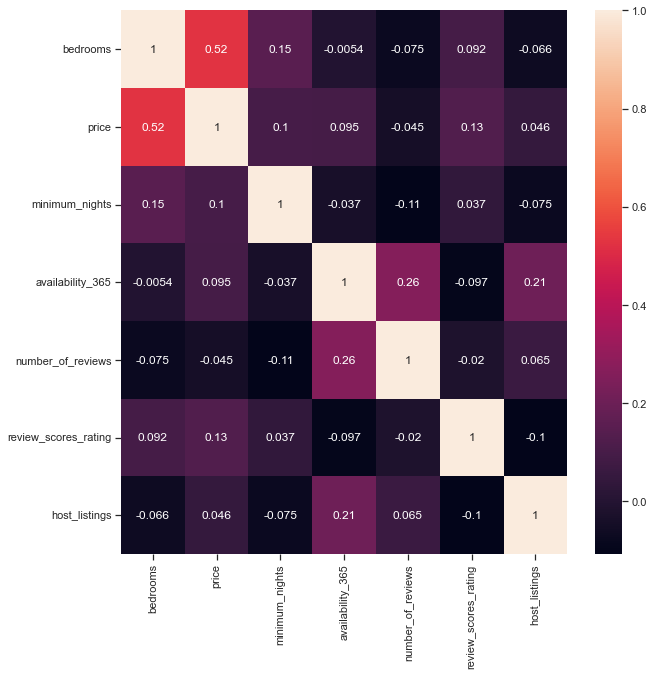

In [40]:
# Create a subplot
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap

#### - There is a  positive correlation between number of listings and the availabiltiy in the year.
#### - There is a weak positive correlation between price and the number of bedrooms of the listings. 
#### - There is a weak positive correlation between the availabiltiy in the year and number of reviews , which is easy explainable, because they grow simultaneously and there is real no insight.

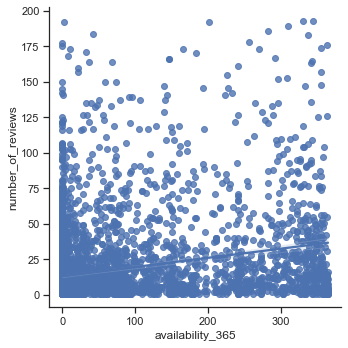

In [41]:
# Create a scatterplot for  "availability_365" and "number_of_reviews" columns
sns.lmplot(x = 'availability_365', y = 'number_of_reviews', data = sub)

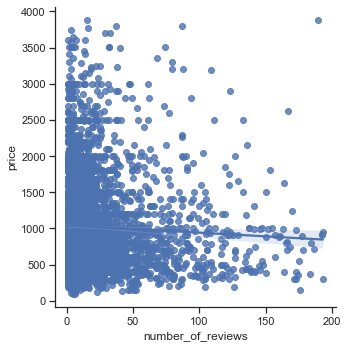

In [42]:
# Create a scatterplot for "price" and "number_of_reviews" to check for more outliers
sns.lmplot(x = 'number_of_reviews', y = 'price', data = sub)

#### The scatterplots are not readable as there are some outliers, that need to be removed.

In [43]:
# Get quantile for columns with outliers from sub data frame
q1 = sub['number_of_reviews'].quantile(0.99)
q2 = sub['price'].quantile(0.99)

In [44]:
# Creating clean data frame without outliers
sub_clean = sub[sub['number_of_reviews'] < q1]

In [45]:
sub_clean = sub_clean[sub_clean['price'] < q2]

In [46]:
sub = sub_clean

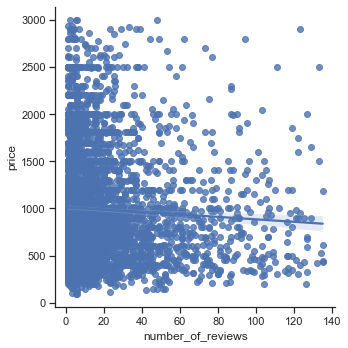

In [47]:
# Create a scatterplot for "price" and "number_of_reviews" to check for more outliers
sns.lmplot(x = 'number_of_reviews', y = 'price', data = sub)

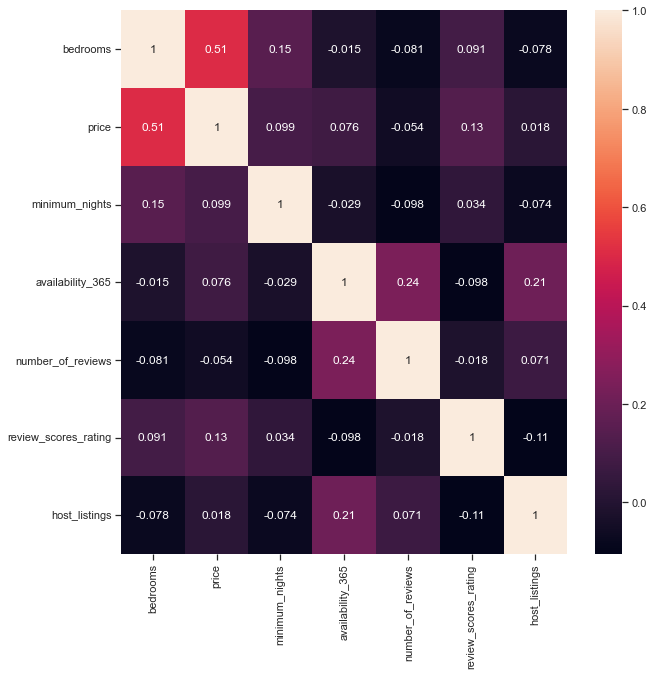

In [48]:
# Create a subplot again with clean data frame
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap

#### -There now is positive correlation between number of listings and the availabiltiy in the year.
#### -There now is a stronger positive correlation between price and the number of bedrooms of the listings. 
#### - There now is a weak positive correlation between the availabiltiy in the year and number of reviews , which is easy explainable, because they grow simultaneously and there is real no insight.

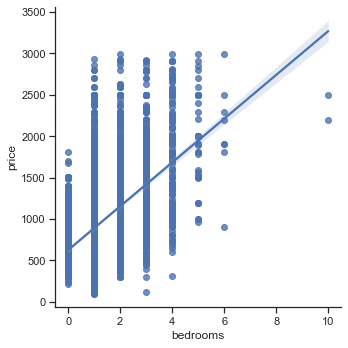

In [49]:
# Create a scatterplot for  "availability_365" and "host_listings" columns again with cleanded data set
sns.lmplot(x = 'bedrooms', y = 'price', data = sub)

#### The scatterplot shows a positive relationship, but there aren't a lot of data points around the linse, so the line will not fit that good and there’s a great degree of variability. It could make sense to remove the outlier, but it's no unlogical outlier I let it in the data frame.

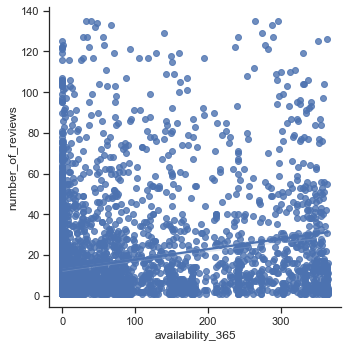

In [50]:
# Create a scatterplot for  "availability_365" and "number_of_reviews" columns
sns.lmplot(x = 'availability_365', y = 'number_of_reviews', data = sub)

#### The scatterplot shows a weak positive relationship, but there aren't a lot of data points around the linse, so the line will not fit that good and there’s a great degree of variability.

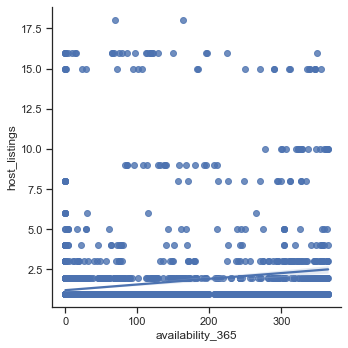

In [51]:
# Create a scatterplot for  "review_score" and "sqaure_feet" columns
sns.lmplot(x = 'availability_365', y = 'host_listings', data = sub)

In [52]:
# Get quantile for columns with outliers from sub data frame
q3 = sub['host_listings'].quantile(0.99)

In [53]:
# Creating clean data frame without outliers
sub_clean = sub[sub['host_listings'] < q3]

In [54]:
sub = sub_clean

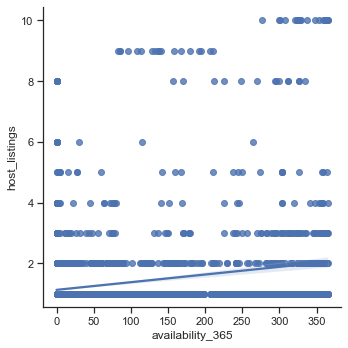

In [55]:
# Create a scatterplot for  "review_score" and "sqaure_feet" columns
sns.lmplot(x = 'availability_365', y = 'host_listings', data = sub)

#### The scatterplot shows a weak positive relationship, but there aren't a lot of data points around the linse, so the line will not fit that good and there’s a great degree of variability. It could make sense to remove the outlier of sqaure feet, but it's no unlogical outlier I let it in the data frame.

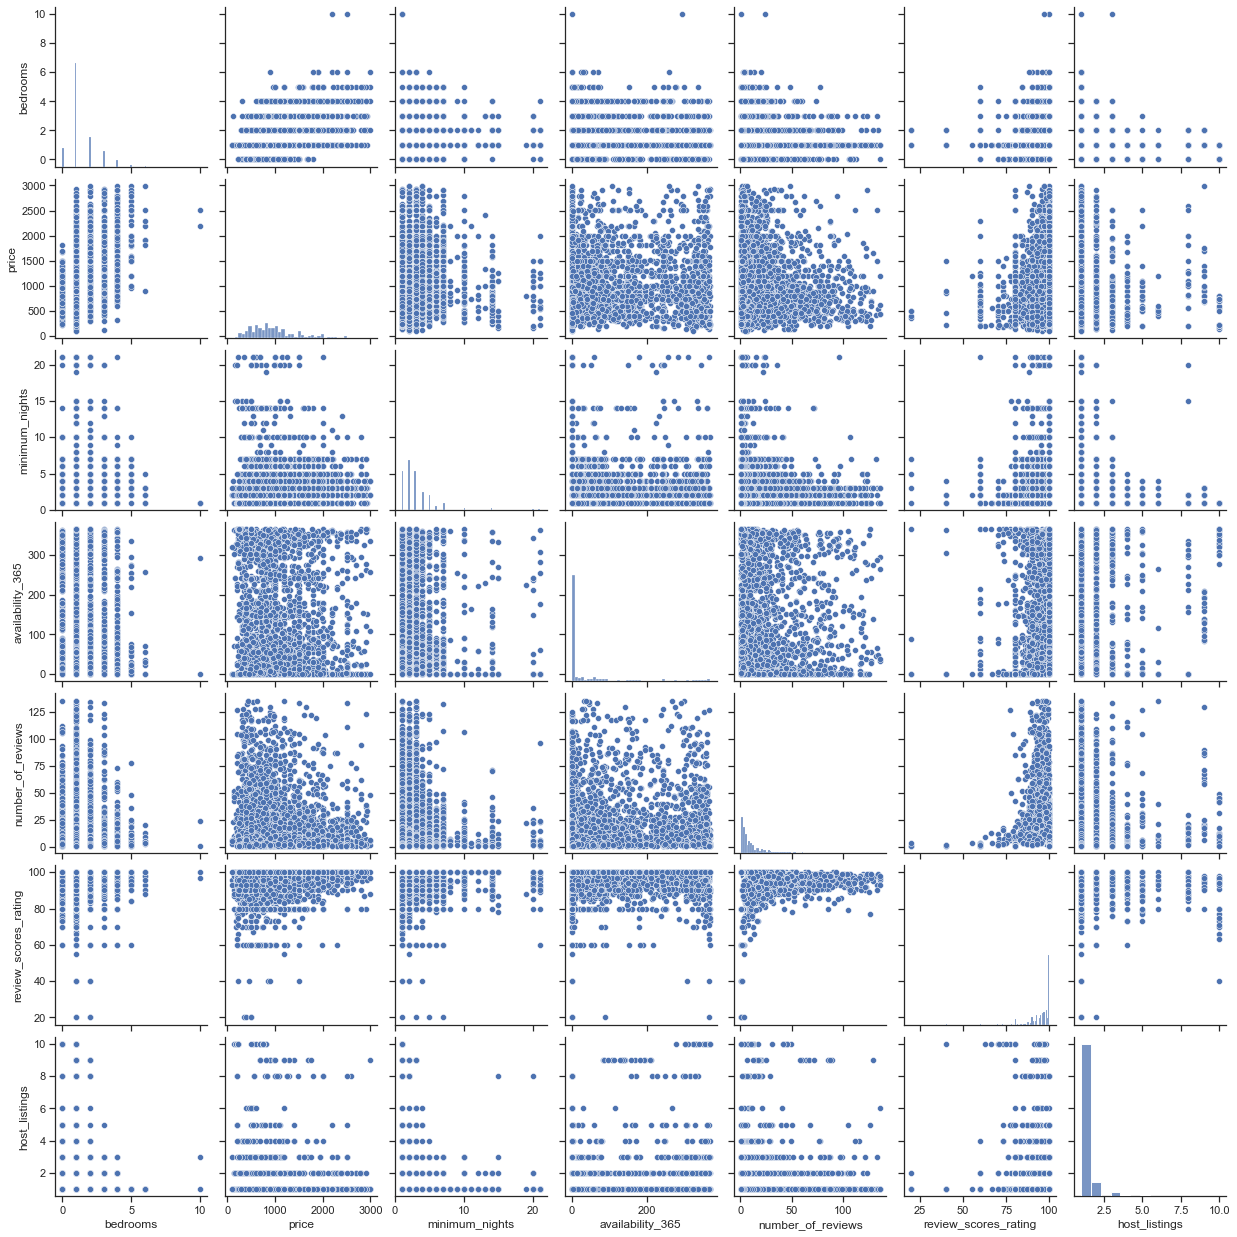

In [56]:
# Create pair plot of entire dataset
g = sns.pairplot(sub)

#### There is no need for further exploration as the correlated variables are allready explored.

<AxesSubplot:xlabel='price', ylabel='Count'>

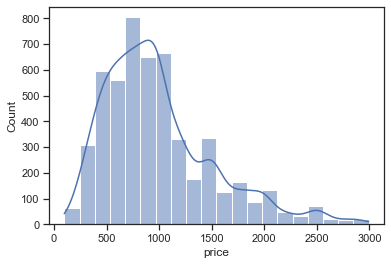

In [57]:
# Use a histogram to visualize the distribution of the dependent variable - price
sns.histplot(sub['price'], bins = 20, kde = True)

In [58]:
# Get quantile for columns with outliers for original data frame
q1 = df['number_of_reviews'].quantile(0.99)
q2 = df['price'].quantile(0.99)
q3 = df['host_listings'].quantile(0.99)

In [59]:
# Creating clean data frame without outliers for orignal data frame
df_clean = df[df['number_of_reviews'] < q1]

In [60]:
df_clean = df_clean[df_clean['price'] < q2]

In [61]:
df_clean = df_clean[df_clean['host_listings'] < q3]

In [62]:
df = df_clean
df.head()

,id,name,host_id,host_since,street,neighbourhood,city,state,zipcode,country,latitude,longitude,property_type,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings,reviews_per_month
0,145320,In the middle of it all - with a view!,703851,2011-06-15,"Stockholm, Stockholms laen, Sweden",Soedermalm,Stockholm,Stockholms laen,118 53,Sweden,5.931.364,1.805.256,Apartment,1.0,1285.0,2,0,72,97.0,1,2
2,170651,Petit Charm Rooftop next to heaven,814021,2011-07-13,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11737,Sweden,5.931.568,1.803.138,Apartment,1.0,745.0,3,197,32,93.0,1,0
3,206221,Doubleroom at Soedermalm &trendySofo,1022374,2011-08-26,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11639,Sweden,5.931.226,1.807.942,Bed and breakfast,1.0,667.0,3,332,78,98.0,1,0
4,220851,One room in appartement,412283,2011-02-27,"Stockholm, Stockholm County, Sweden",Kungsholmen,Stockholm,Stockholm County,11341,Sweden,5.933.376,1.803.816,Apartment,1.0,598.0,3,336,45,93.0,1,0
5,259722,Near shopping-IT Business(Bunk bed),1261494,2011-10-07,"Stockholm, Stockholm County, Sweden",Rinkeby-Kista,Stockholm,Stockholm County,16474,Sweden,5.941.003,179.366,Apartment,1.0,226.0,21,307,23,92.0,1,0


In [63]:
df.shape

(5213, 21)

In [64]:
df.describe()

,id,host_id,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings,reviews_per_month
count,5.213000e+03,5.213000e+03,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000
mean,1.872682e+07,6.822836e+07,1.400537,990.957990,3.094763,58.556302,15.681565,95.672549,1.271053,0.623250
std,1.063092e+07,7.239442e+07,1.009707,525.615798,2.531050,103.378739,21.688435,6.544259,1.015233,1.246335
min,1.453200e+05,9.842000e+03,0.000000,98.000000,1.000000,0.000000,1.000000,20.000000,1.000000,0.000000
25%,9.400718e+06,1.468859e+07,1.000000,598.000000,2.000000,0.000000,3.000000,94.000000,1.000000,0.000000
50%,1.886122e+07,3.715448e+07,1.000000,902.000000,2.000000,0.000000,7.000000,98.000000,1.000000,0.000000
75%,2.666322e+07,9.777807e+07,2.000000,1197.000000,4.000000,69.000000,18.000000,100.000000,1.000000,1.000000
max,3.796416e+07,2.871015e+08,10.000000,2992.000000,21.000000,365.000000,135.000000,100.000000,10.000000,9.000000


In [65]:
#Creating categorical variable that groups the "price" column into categories
df.loc[df['price'] < 500, 'price_group'] = 'Low Price'
df.loc[(df['price'] >= 500) & (df['price'] < 1000), 'price_group'] = 'Middle Price'
df.loc[df['price'] >= 1000, 'price_group'] = 'High Price'

In [66]:
df['price_group'].value_counts()

Middle Price    2362
High Price      2110
Low Price        741
Name: price_group, dtype: int64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

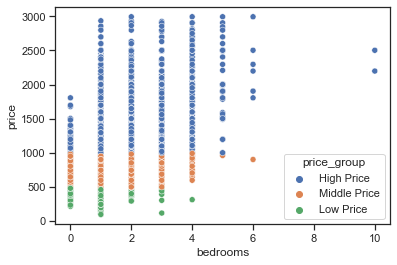

In [67]:
# Creating categorical plot with the 'price' and other variables
sns.set(style="ticks")
sns.scatterplot(x = 'bedrooms', y = 'price', hue = 'price_group', data = df)

#### The more bedrooms a listings has the higher the price is. There are no listings with 5 or more bedrooms, that are in the low price category. Same goes for most of the listings in the middle price category.

### 4. Questions <a name="paragraph3"></a>

### How many listings are active?

#### Unfortunately there is no variable to check for active listings.

#### The graph shows that the majority of the listings had an review in the year the data was collected, therefore most of the listings are active.

### How do prices differ from listings in the centrum to listings in the outskirts

#### This question should be answered in future tasks.

### How does the number of reviews correlate with the price of a listing?

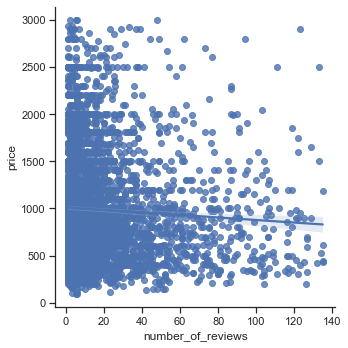

In [71]:
# Create a scatterplot for  "number_of_reveiws" and "price"
sns.lmplot(x = 'number_of_reviews', y = 'price', data = df)

#### There are more listings with less than 100 reviews. The higher the price the less is the number of reviews.

### Where are the most listings located?

In [72]:
df['neighbourhood'].value_counts()

Soedermalm                1498
Norrmalm                   630
Kungsholmen                534
Haegersten-Liljeholmen     533
Oestermalm                 480
Enskede-Aarsta-Vantoer     441
Skarpnaeck                 312
Bromma                     267
Farsta                     132
Aelvsjoe                   107
Haesselby-Vaellingby        90
Rinkeby-Kista               76
Spaanga-Tensta              60
Skaerholmen                 52
Soedermalms                  1
Name: neighbourhood, dtype: int64

### New Questions
#### 1. How does the price and the rating correlate with the postion of the listing?
#### 2 What drives the prices of the listings?
#### 3. Why is the correlation of rating and price that low?

### 5. Hypotheses <a name="paragraph4"></a>

#### The price of listings in the city center will be higher than in the outskirts. 
#### The higher the number of listings the higher the price.
#### The property type does not affect the rating.

### 6. Data Export <a name="paragraph5"></a>

In [73]:
# Overwriting data frame since there were some new data cleaning
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'airbnb_df.pkl'))
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'airbnb_df.csv'))